<a href="https://colab.research.google.com/github/bharshal/car_damage_detector/blob/master/pre_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import cv2
import json
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [ ]:
!ls "/content/drive/My Drive/task_artivartic"
!unzip "/content/drive/My Drive/task_artivartic/dataset_for_car_damage_detection.zip" -d "/content/drive/My Drive/task_artivartic/"

In [6]:
!ls -R "/content/drive/My Drive/task_artivartic/dataset"

'/content/drive/My Drive/task_artivartic/dataset':
damage_masks  part_masks  test	train  val

'/content/drive/My Drive/task_artivartic/dataset/damage_masks':
10.npy	19.npy	26.npy	34.npy	41.npy	51.npy	59.npy	6.npy	78.npy
13.npy	20.npy	27.npy	36.npy	42.npy	52.npy	5.npy	70.npy	79.npy
14.npy	21.npy	29.npy	37.npy	43.npy	53.npy	61.npy	71.npy	7.npy
15.npy	22.npy	2.npy	38.npy	44.npy	54.npy	62.npy	73.npy	80.npy
16.npy	23.npy	30.npy	39.npy	46.npy	55.npy	63.npy	74.npy	8.npy
17.npy	24.npy	32.npy	3.npy	48.npy	56.npy	64.npy	75.npy	9.npy
18.npy	25.npy	33.npy	40.npy	49.npy	57.npy	68.npy	76.npy	val

'/content/drive/My Drive/task_artivartic/dataset/damage_masks/val':
1.npy  31.npy  47.npy  4.npy  50.npy  58.npy  69.npy  77.npy

'/content/drive/My Drive/task_artivartic/dataset/part_masks':
10.npy	19.npy	26.npy	34.npy	41.npy	51.npy	59.npy	6.npy	78.npy
13.npy	20.npy	27.npy	36.npy	42.npy	52.npy	5.npy	70.npy	79.npy
14.npy	21.npy	29.npy	37.npy	43.npy	53.npy	61.npy	71.npy	7.npy
15.npy	22.npy	2.npy	38.npy	44.np

In [7]:
with open("/content/drive/My Drive/task_artivartic/dataset/train/via_region_data.json") as f:
  _json1 = json.load(f)
#print(_json1)
print(len(_json1.keys()))

62


In [8]:
with open("/content/drive/My Drive/task_artivartic/dataset/train/train_multiclass.json") as f:
  _json2 = json.load(f)
#print(_json2)
print(len(_json2.keys()))

62


In [9]:
keys = _json1.keys()
imgs = []
for key in keys:

	item1 = _json1[key]
	#print(item1)
	filename = item1['filename']
	#print(filename)
	img = cv2.imread("/content/drive/My Drive/task_artivartic/dataset/train/" + str(filename))
	regions = (item1['regions'])
	#print(regions)
	for region in regions:
		all_points_x = region['shape_attributes']['all_points_x']
		all_points_y = region['shape_attributes']['all_points_y']
		#print(all_points_x)
		pts = []
		for i in range(len(all_points_x)):
			pt = [all_points_x[i],all_points_y[i]]
			pts.append(pt)
		#print(pts)
		pts = np.array(pts, np.int32)
		pts = pts.reshape((-1,1,2))
		cv2.polylines(img,[pts],True,(0,255,255),thickness=2)


	item2 = _json2[key]
	#print(item2)
	regions = (item2['regions'])
	#print(regions)
	for region in regions:
		all_points_x = region['shape_attributes']['all_points_x']
		all_points_y = region['shape_attributes']['all_points_y']
		#print(all_points_x)
		pts = []
		for i in range(len(all_points_x)):
			pt = [all_points_x[i],all_points_y[i]]
			pts.append(pt)
		#print(pts)
		pts = np.array(pts, np.int32)
		pts = pts.reshape((-1,1,2))
		cv2.polylines(img,[pts],True,(255,0,255),thickness=2)
  
	imgs.append(img)

print(len(imgs))

62


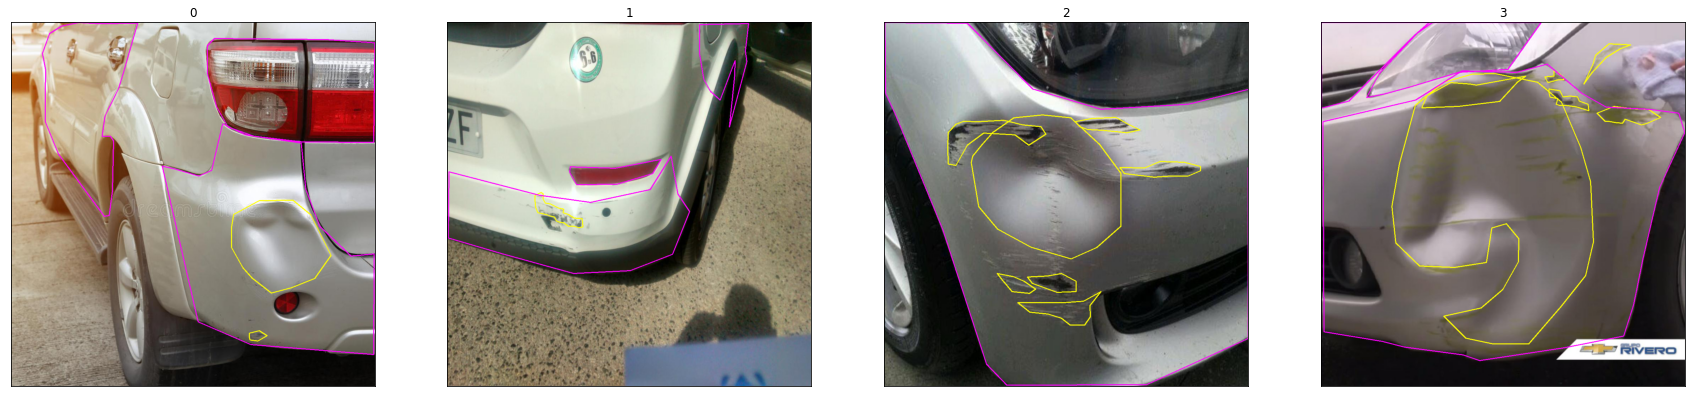

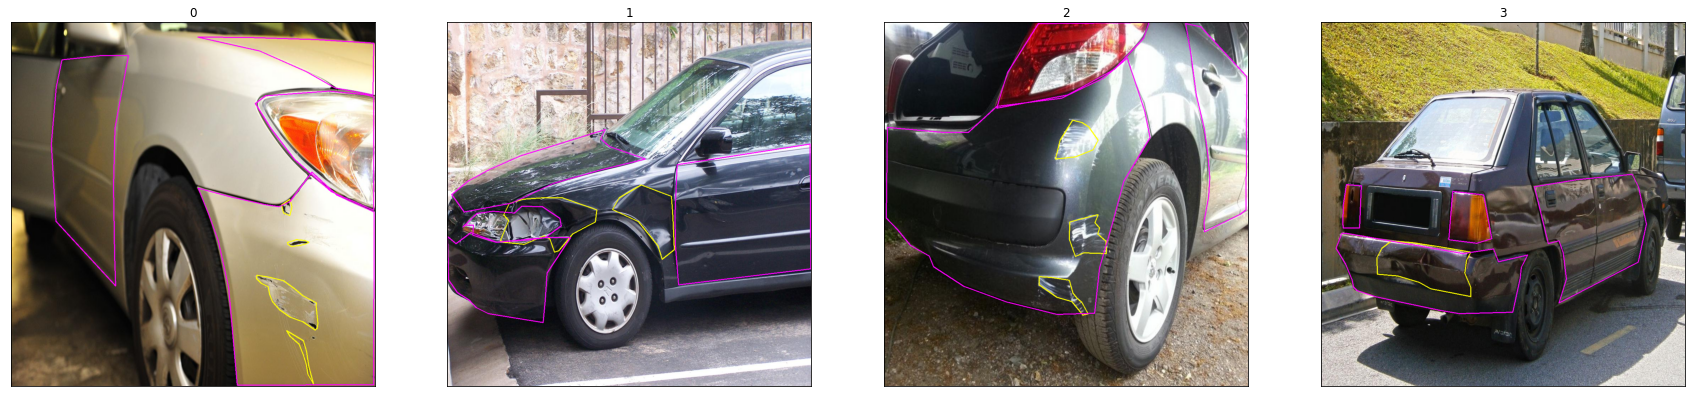

In [10]:
plt.figure(figsize=(30, 8))
imgs_ = imgs[0:4]
for i,image in enumerate(imgs_):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(' '.join(str(i).split('_')).title())
    plt.imshow(image)
plt.show()

plt.figure(figsize=(30, 8))
imgs_ = imgs[-4:]
for i,image in enumerate(imgs_):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(' '.join(str(i).split('_')).title())
    plt.imshow(image)
plt.show()

Creating car body part masks

In [ ]:
!mkdir "/content/drive/My Drive/task_artivartic/dataset/part_masks"

In [ ]:
def visualise(imgs):
  n = len(imgs)
  imgs[0] = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(30, 8))
  for i,image in enumerate(imgs):
      plt.subplot(1, n, i + 1)
      plt.xticks([])
      plt.yticks([])
      plt.title(' '.join(str(i).split('_')).title())
      plt.imshow(image)
  plt.show()

In [ ]:
with open("/content/drive/My Drive/task_artivartic/dataset/val/val_multiclass.json") as f:
  _json2 = json.load(f)
  keys = _json2.keys()
!mkdir "/content/drive/My Drive/task_artivartic/dataset/part_masks/val"

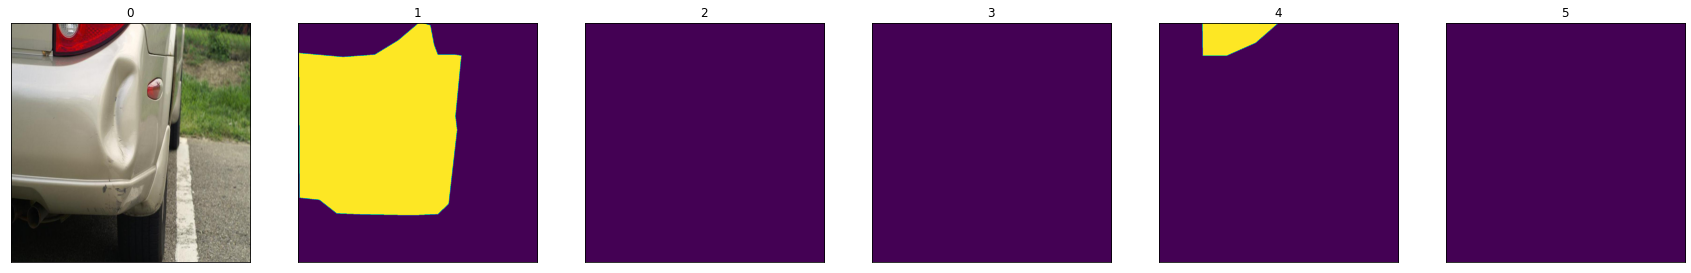

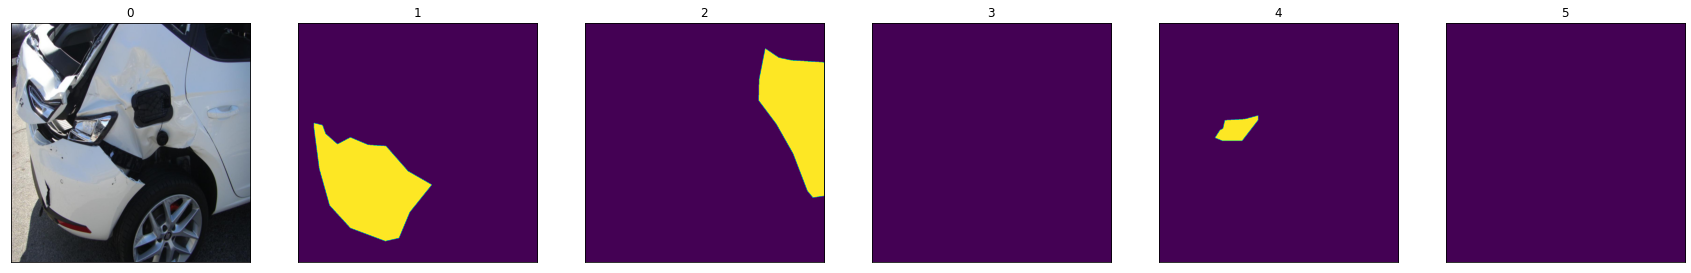

In [ ]:
count = 0
for key in keys:
  imgs = []
  item1 = _json2[key]
  filename = item1['filename']
  img = cv2.imread("/content/drive/My Drive/task_artivartic/dataset/val/" + str(filename))
  imgs.append(img)
  width,height,_ = img.shape

  hood = np.zeros([width,height],dtype='uint8')
  headlamp = np.zeros([width,height],dtype='uint8')
  front_bumper = np.zeros([width,height],dtype='uint8')
  door = np.zeros([width,height],dtype='uint8')
  rear_bumper = np.zeros([width,height],dtype='uint8')

  regions = (item1['regions'])
  
  for region in regions:
    name = region['region_attributes']['name']
    all_points_x = region['shape_attributes']['all_points_x']
    all_points_y = region['shape_attributes']['all_points_y']

    mask_pts = []

    for i in range(len(all_points_x)):
      mask_pt = (all_points_x[i],all_points_y[i])
      mask_pts.append(mask_pt)

    mask_pts = np.array(mask_pts, dtype='int32')

    if name == "hood":
      cv2.fillPoly(hood, [mask_pts], (255,0))
    if name == "headlamp":
      cv2.fillPoly(headlamp, [mask_pts], (255,0)) 
    if name == "front_bumper":
      cv2.fillPoly(front_bumper, [mask_pts], (255,0))
    if name == "door":
      cv2.fillPoly(door, [mask_pts], (255,0))
    if name == "rear_bumper":
      cv2.fillPoly(rear_bumper, [mask_pts], (255,0))

  imgs.append(rear_bumper.squeeze())
  imgs.append(door.squeeze())
  imgs.append(front_bumper.squeeze())
  imgs.append(headlamp.squeeze())
  imgs.append(hood.squeeze())

  final = np.dstack([hood,headlamp,front_bumper,door,rear_bumper])
  #print(final.shape)
  with open("/content/drive/My Drive/task_artivartic/dataset/part_masks/val/" + str(filename.split(".")[0])+'.npy', 'wb') as f:
    np.save(f,final)
  if count%5 == 0:
    visualise(imgs)
  count+=1

Creating masks for damage

In [ ]:
!mkdir "/content/drive/My Drive/task_artivartic/dataset/damage_masks"
!ls "/content/drive/My Drive/task_artivartic/dataset/damage_masks/"

mkdir: cannot create directory ‘/content/drive/My Drive/task_artivartic/dataset/damage_masks’: File exists


In [ ]:
with open("/content/drive/My Drive/task_artivartic/dataset/train/via_region_data.json") as f:
  _json1 = json.load(f)
  keys = _json1.keys()
#!mkdir "/content/drive/My Drive/task_artivartic/dataset/damage_masks/val"

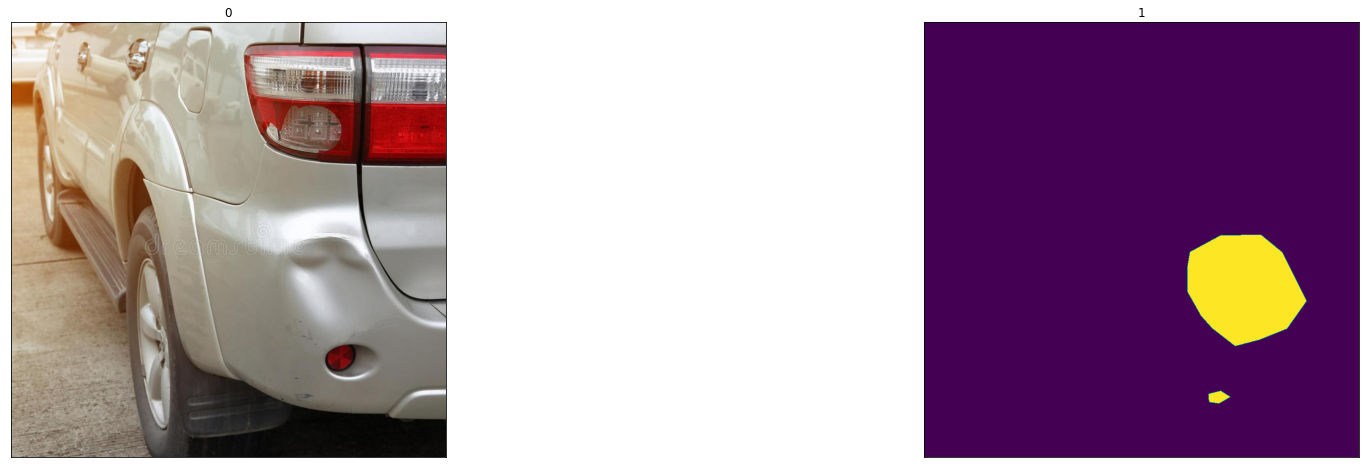

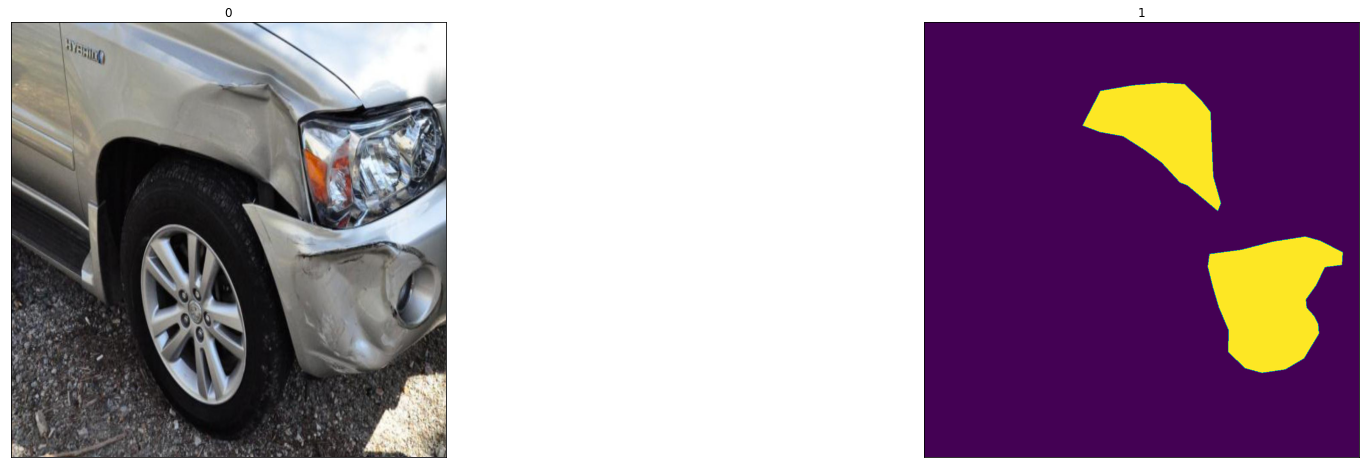

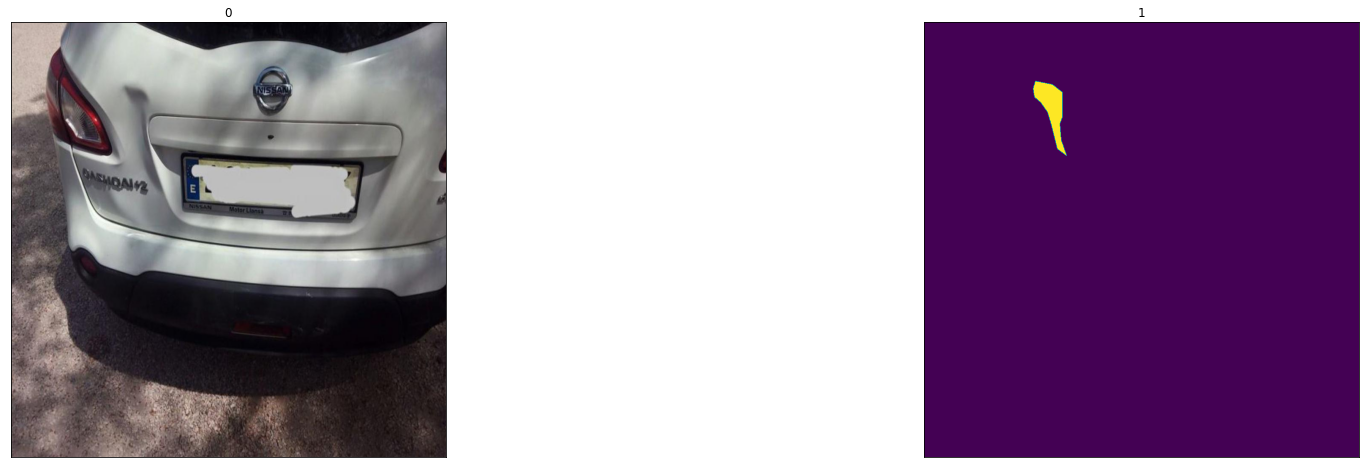

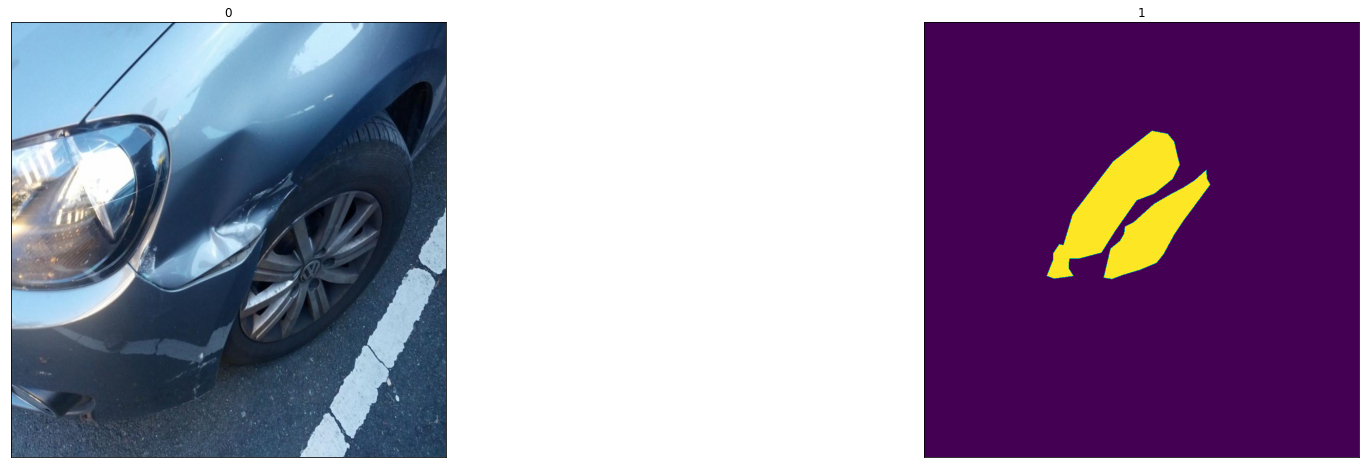

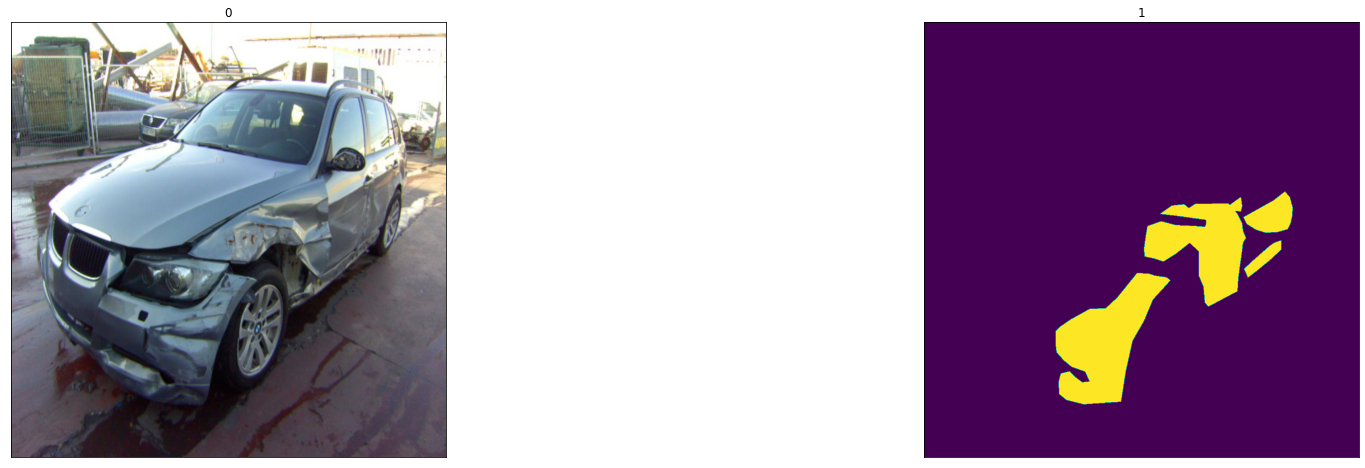

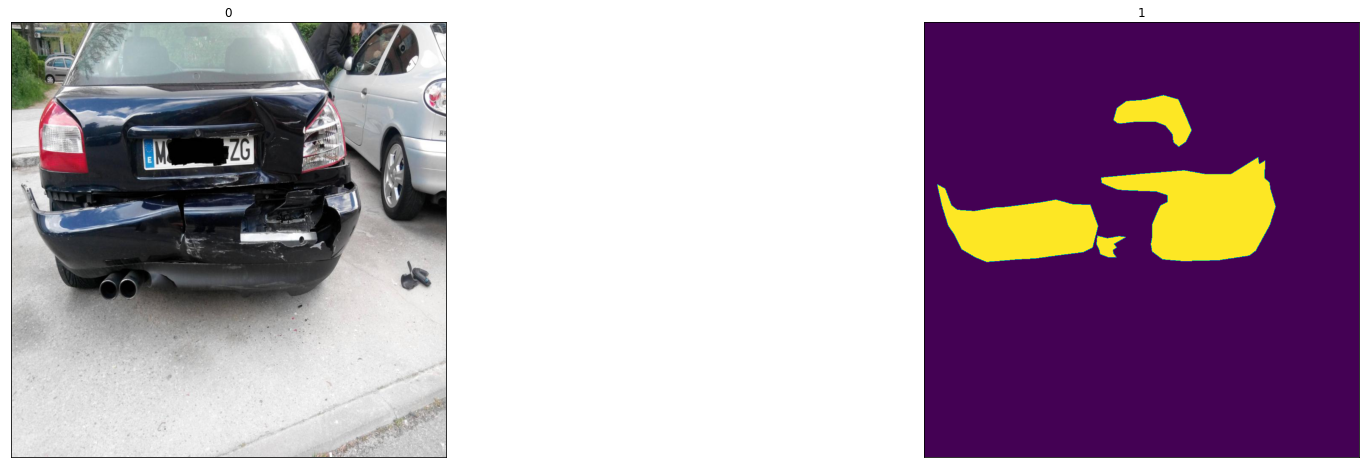

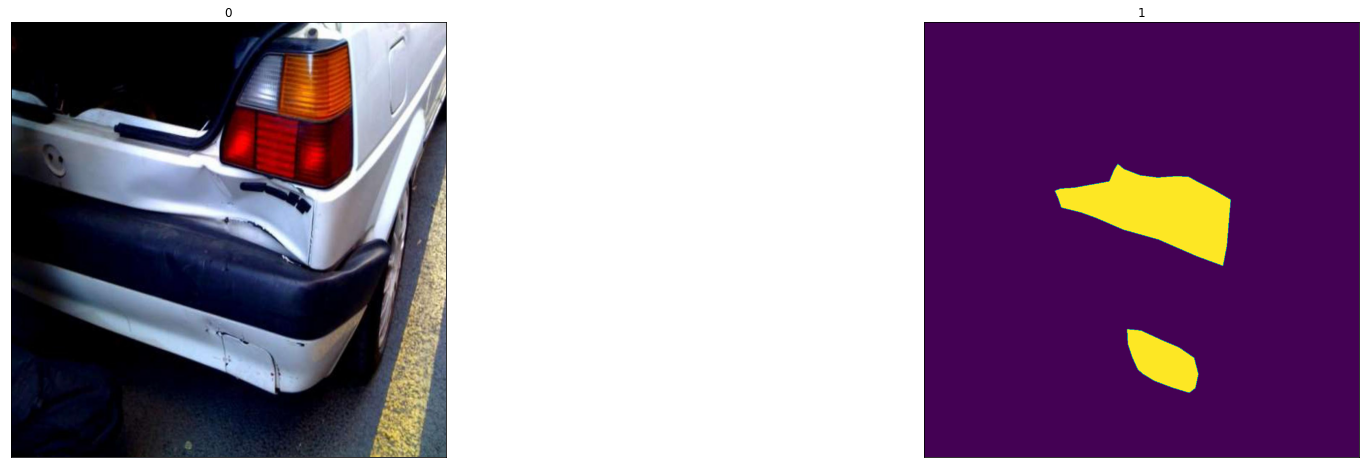

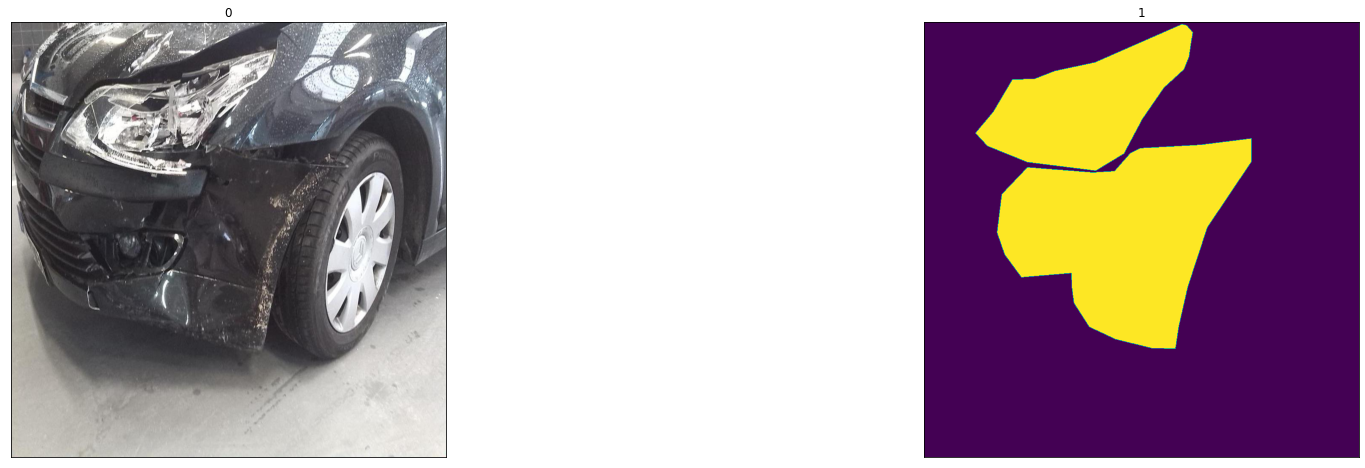

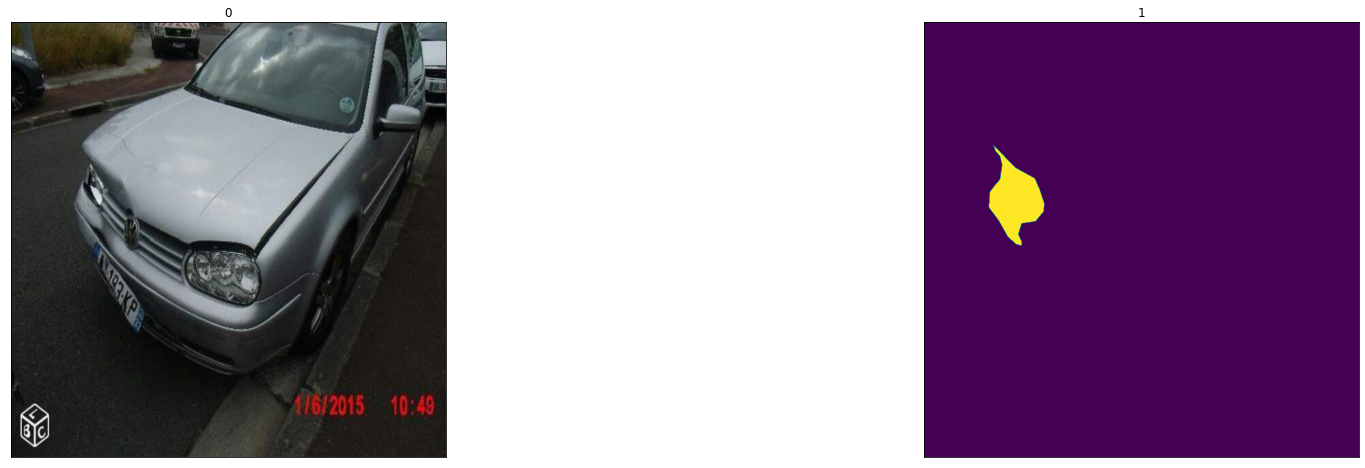

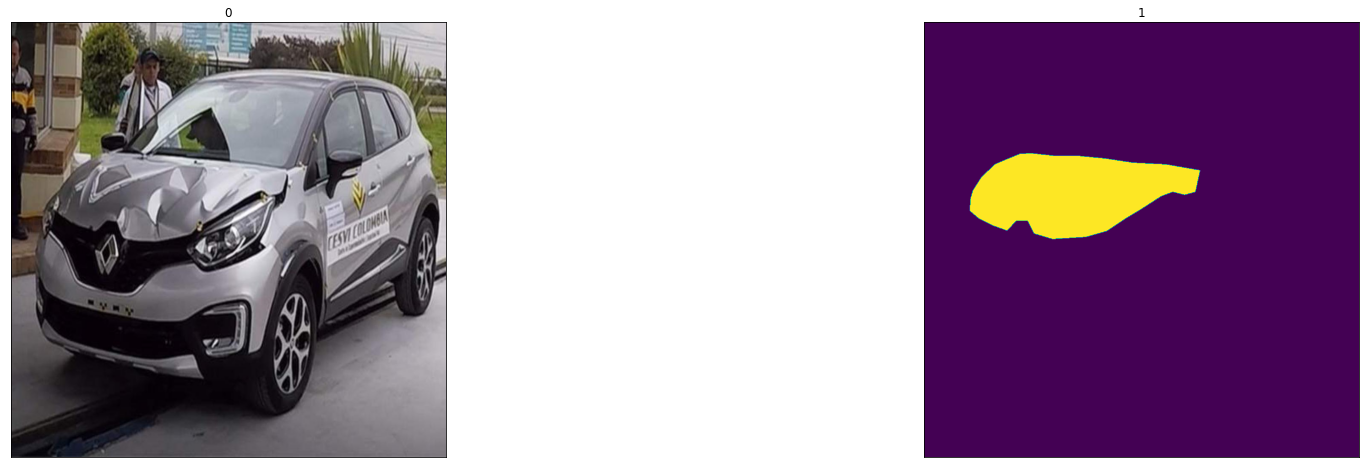

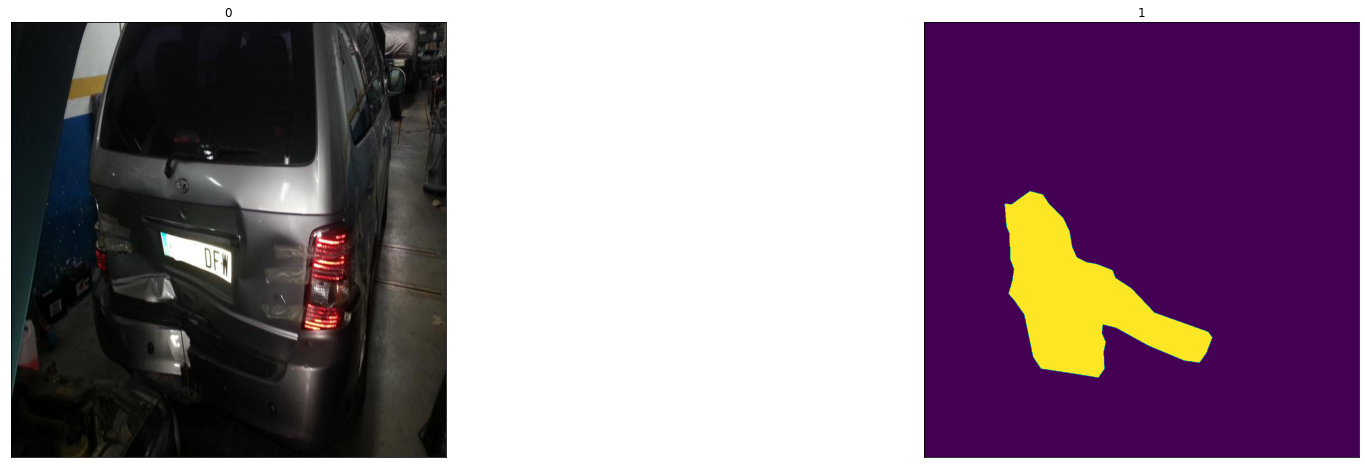

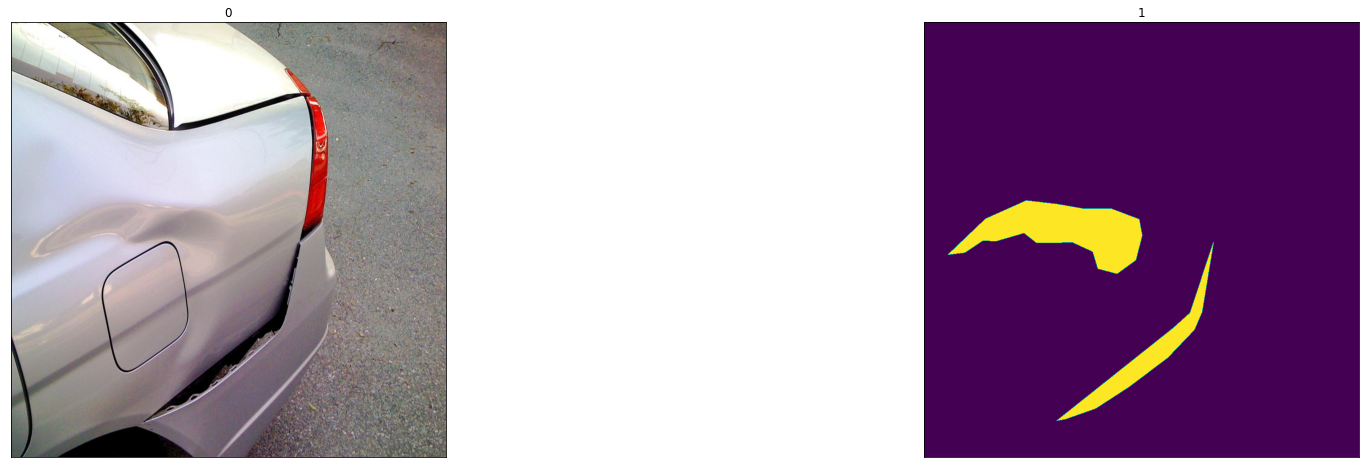

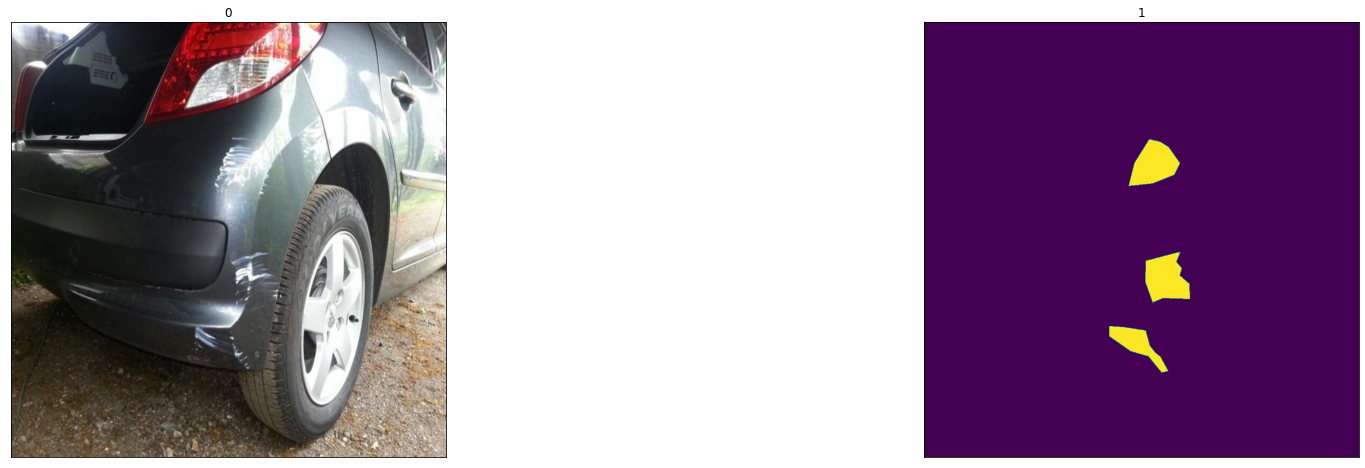

In [ ]:
count = 0
for key in keys:
  imgs = []
  item1 = _json1[key]
  filename = item1['filename']
  img = cv2.imread("/content/drive/My Drive/task_artivartic/dataset/train/" + str(filename))
  imgs.append(img)
  width,height,_ = img.shape

  damage = np.zeros([width,height],dtype='uint8')

  regions = (item1['regions'])
  
  for region in regions:
    all_points_x = region['shape_attributes']['all_points_x']
    all_points_y = region['shape_attributes']['all_points_y']
    mask_pts = []

    for i in range(len(all_points_x)):
      mask_pt = (all_points_x[i],all_points_y[i])
      mask_pts.append(mask_pt)

    mask_pts = np.array(mask_pts, dtype='int32')

    cv2.fillPoly(damage, [mask_pts], (255,0))
  imgs.append(damage)

  with open("/content/drive/My Drive/task_artivartic/dataset/damage_masks/" + str(filename.split(".")[0])+'.npy', 'wb') as f:
    np.save(f,damage)
  if count%5 == 0:
    visualise(imgs)
  count+=1

In [ ]:
!ls -l "/content/drive/My Drive/task_artivartic/dataset/damage_masks"

total 63523
-rw------- 1 root root 1048704 Jul 11 19:08 10.npy
-rw------- 1 root root 1048704 Jul 11 19:08 13.npy
-rw------- 1 root root 1048704 Jul 11 19:08 14.npy
-rw------- 1 root root 1048704 Jul 11 19:08 15.npy
-rw------- 1 root root 1048704 Jul 11 19:08 16.npy
-rw------- 1 root root 1048704 Jul 11 19:08 17.npy
-rw------- 1 root root 1048704 Jul 11 19:08 18.npy
-rw------- 1 root root 1048704 Jul 11 19:08 19.npy
-rw------- 1 root root 1048704 Jul 11 19:08 20.npy
-rw------- 1 root root 1048704 Jul 11 19:08 21.npy
-rw------- 1 root root 1048704 Jul 11 19:08 22.npy
-rw------- 1 root root 1048704 Jul 11 19:08 23.npy
-rw------- 1 root root 1048704 Jul 11 19:08 24.npy
-rw------- 1 root root 1048704 Jul 11 19:08 25.npy
-rw------- 1 root root 1048704 Jul 11 19:08 26.npy
-rw------- 1 root root 1048704 Jul 11 19:08 27.npy
-rw------- 1 root root 1048704 Jul 11 19:08 29.npy
-rw------- 1 root root 1048704 Jul 11 19:08 2.npy
-rw------- 1 root root 1048704 Jul 11 19:08 30.npy
-rw------- 1 root ro